## Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Outline
- Data Preprocessing
- Exploratory Data Analysis
- Machine Learning
- Conclusion



## Data description
Geological exploration data for the three regions are stored in files:
- geo_data_0.csv
- geo_data_1.csv 
- geo_data_2.csv
- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).

Conditions:
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.


## Data Preprocessing
- Download and prepare the data. Explain the procedure.


In [1]:
# Initialize
import pandas as pd
import numpy as np 

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score





In [2]:
# Import the file and create the dataset

region1 = pd.read_csv('/datasets/geo_data_0.csv')
region2 = pd.read_csv('/datasets/geo_data_1.csv')
region3 = pd.read_csv('/datasets/geo_data_2.csv')

df_all=[region1,region2,region3]


#### Region 1

In [3]:
# Print sample of table

region1.head()


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# Descriptive statistics

region1.describe()


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# Missing values

region1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
# Correlation between values

region1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


#### Region 2

In [8]:
# Print sample of table

region2.head()


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
region2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
# Descriptive statistics

region2.describe()


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
# Correlation between values

region2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


#### Region 3

In [12]:
# Print sample of table
 
region3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
region3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
# Descriptive statistics

region3.describe()


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [15]:
# Correlation between values

region3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


#### Conclusion

The only data I see problematic is the IDs are mixed case. However that shouldn't impact my analysis. Hence I leave it as is. We may remove these IDs since they don't serve any purpose in analysis.


## Exploratory Data Analysis

<AxesSubplot:>

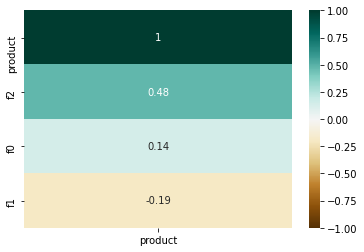

<AxesSubplot:>

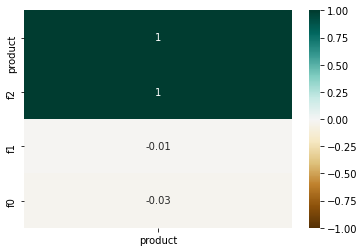

<AxesSubplot:>

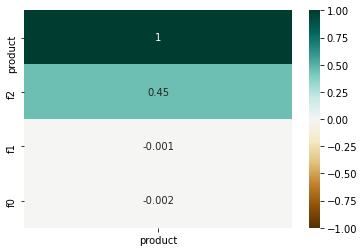

In [16]:
# Heatmap
for df in df_all:
    heatmap = display(sns.heatmap(df.corr()[['product']].sort_values(by='product', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG'))
    plt.show()

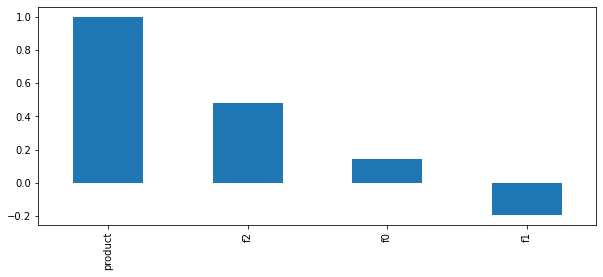

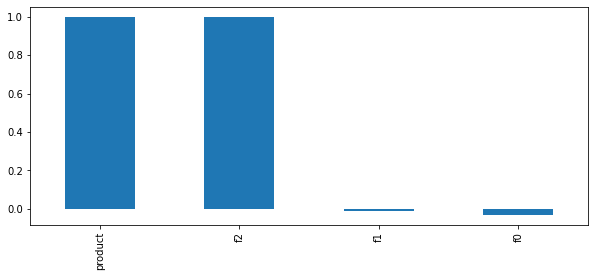

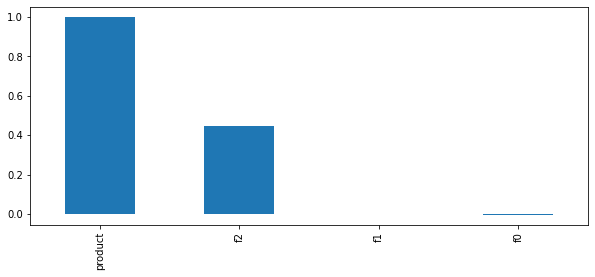

In [17]:
for df in df_all:
  plt.figure(figsize=(10,4))
  df.corr()['product'].sort_values(ascending = False).plot(kind='bar')
  plt.show()

#### Conclusion
- The heatmap depicts that product has strong positive correlation with f2.
- It has weaker or negative correlation with f0.
- product has negative correlation with f1
- The BAR Chart also displays that
    - f2 has high correlation with product
    - f0 has a bit weaker or negative correlation 
    - f1 has negative correlation with product.

## Machine Learning

### Feature Engineering & Model Testing

Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.


In [18]:
# Dropping id column which will have no use in the Machine Learning
i=0
for df in df_all:
    display(df.shape)
    df_all[i]=df.drop(['id'],axis=1)
    i+=1

for df in df_all:
    display(df.shape)

(100000, 5)

(100000, 5)

(100000, 5)

(100000, 4)

(100000, 4)

(100000, 4)

In [19]:
# Function for Linear Regression model for all 3 datasets
  
RANDOM_STATE=12345

for df in df_all:
    def LinearRegressionModel(df):
        target = df['product']
        features = df.drop(['product'] , axis=1)

    # FIRST SPLIT INTO TRAINING(75%) AND VALIDATION_TEST (25%)
        features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=RANDOM_STATE)

        totsize = len(df)
        print('training set  : {0:.0%}'.format(len(features_train) /totsize),features_train.shape, ', training target   :',target_train.shape)
        print('validation set: {0:.0%}'.format(len(features_valid)/totsize),features_valid.shape,', validation target :',target_valid.shape)


    # Standardize the numerical features.
        

        numeric = ['f0', 'f1', 'f2']
        scaler = StandardScaler()
    
    # < transform feature set >
        scaler.fit(features_train[numeric])
        features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

    # < transform validation set >
        features_valid.loc[:,numeric] = scaler.transform(features_valid[numeric])
    # display(features_valid.head(5),features_train.head(5))
        model = LinearRegression() 
        model.fit(features_train, target_train)

        predicted_valid = model.predict(features_valid)
        mean = predicted_valid.mean()
        mse = mean_squared_error(target_valid, predicted_valid)
        rmse = mse**0.5
        print("Average Volume: {:.2f} RMSE: {:.2f}".format(mean,rmse))
        print()
        # return(target,features)
    LinearRegressionModel(df)

    
        

    
    #LinearRegressionModel(df)
        


    

    

training set  : 75% (75000, 3) , training target   : (75000,)
validation set: 25% (25000, 3) , validation target : (25000,)
Average Volume: 92.59 RMSE: 37.58

training set  : 75% (75000, 3) , training target   : (75000,)
validation set: 25% (25000, 3) , validation target : (25000,)
Average Volume: 68.73 RMSE: 0.89

training set  : 75% (75000, 3) , training target   : (75000,)
validation set: 25% (25000, 3) , validation target : (25000,)
Average Volume: 94.97 RMSE: 40.03



In the beginning of this step I splitted the three dataframe with a rateo of 75:25, defining wich are the features and the target. 

- Obtained for "Region 1" an rmse of 37.58, and an average volume of 92.59. 
- Obtained for "Region 2" an rmse of 0.89 and the average volume of 68.73. 
- Obtained for "Geographic Area 2" an rmse of 40.03 and an average volume of 94.97. 

###  Profit calculation:
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Provide the findings about the preparation for profit calculation step.

In [20]:
# Storing useful variables

N_POINTS_ALL = 500
N_POINTS = 200
BUDGET = 100000000 #for 200
INCOME_PER_VOLUME = 4500
THRES_RISK_MASK = 2.5/100
BUDGET_PER_ONE = BUDGET/N_POINTS
UNIT_OF_VOLUME = 1000 #Barrels

region1avgvol = 92.59
region2avgvol = 68.73
region3avgvol = 94.97


In [21]:
# Product units needed to reach our budget in the region.
units_per_region = BUDGET / INCOME_PER_VOLUME 
print('To reach our Budget we need {:.2f}'.format(units_per_region),'product units in the entire region.')

#Product units needed to reach our budget in a single well.
units_per_well = units_per_region / 200

print(f"The volume of reserves sufficient for developing a new well without losses = {units_per_well:.2f}")


To reach our Budget we need 22222.22 product units in the entire region.
The volume of reserves sufficient for developing a new well without losses = 111.11


In [22]:

#Comparing the result with the averages.

result_0 = region1avgvol - units_per_well
result_1 = region2avgvol - units_per_well
result_2 = region3avgvol - units_per_well

print(result_0,'\n',result_1,'\n',result_2)


-18.52111111111111 
 -42.38111111111111 
 -16.141111111111115


Stored all the values necessaries to condupt the analysis and calculate the revenue. To reach 100 Million dollars necessaries for 200 oil wells are needed: 22.22 Million barrels. This make a total of 22222.22 product units needed and 111.11 for each wells.



### Profit Function
Write a function to calculate profit from a set of selected oil wells and model predictions:
- 4.1. Pick the wells with the highest values of predictions.
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [26]:
# Profit function for all 3 regions

profit_in_millions = []

for df in df_all:
    def profits(df):
        target = df['product']
        features = df.drop(['product'] , axis=1)

    # FIRST SPLIT INTO TRAINING(75%) AND VALIDATION_TEST (25%)
        features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=RANDOM_STATE)

        
    # Standardize the numerical features.
        

        numeric = ['f0', 'f1', 'f2']
        scaler = StandardScaler()
    
    # < transform feature set >
        scaler.fit(features_train[numeric])
        features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

    # < transform validation set >
        features_valid.loc[:,numeric] = scaler.transform(features_valid[numeric])
    # display(features_valid.head(5),features_train.head(5))
        model = LinearRegression() 
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        predictions_sorted = pd.Series(predicted_valid, target_valid.index).sort_values(ascending=False)
        top_target = target_valid.loc[predictions_sorted.index][:N_POINTS]
        profit = (((top_target.sum() * INCOME_PER_VOLUME) - BUDGET) / 1000000)
        return profit
    arr = profits(df)
    profit_in_millions.append(arr)   

print(profit_in_millions)

[33.208260431398514, 24.150866966815116, 27.103499635998322]


### Bootstrapping

Calculate risks and profit for each region:
- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.



In [27]:
# Region 1
reg1_features = region1.drop(['product','id'],axis=1)
reg1_target = region1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(reg1_features, reg1_target, test_size=0.25, random_state=12345)
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
    
    # < transform feature set >
scaler.fit(features_train_1[numeric])
features_train_1.loc[:,numeric] = scaler.transform(features_train_1[numeric])

    # < transform validation set >
features_valid_1.loc[:,numeric] = scaler.transform(features_valid_1[numeric])
    # display(features_valid.head(5),features_train.head(5))
    
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) # < train the model >
predictions_valid_1 = model_1.predict(features_valid_1) 




In [28]:
# Region 2
reg2_features = region2.drop(['product','id'],axis=1)
reg2_target = region2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(reg2_features, reg2_target, test_size=0.25, random_state=12345)
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
    
    # < transform feature set >
scaler.fit(features_train_2[numeric])
features_train_2.loc[:,numeric] = scaler.transform(features_train_2[numeric])

    # < transform validation set >
features_valid_2.loc[:,numeric] = scaler.transform(features_valid_2[numeric])
    # display(features_valid.head(5),features_train.head(5))
    
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) # < train the model >
predictions_valid_2 = model_2.predict(features_valid_2) 


In [29]:
# Reg 3
reg3_features = region3.drop(['product','id'],axis=1)
reg3_target = region3['product']

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(reg3_features, reg3_target, test_size=0.25, random_state=12345)
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
    
    # < transform feature set >
scaler.fit(features_train_3[numeric])
features_train_3.loc[:,numeric] = scaler.transform(features_train_3[numeric])

    # < transform validation set >
features_valid_3.loc[:,numeric] = scaler.transform(features_valid_3[numeric])
    # display(features_valid.head(5),features_train.head(5))
    
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3) # < train the model >
predictions_valid_3 = model_3.predict(features_valid_3) 


In [30]:
# Profit function
def profit(region, predictions):
    predictions_sorted = pd.Series(predictions, region.index).sort_values(ascending=False)
    top_target = region.loc[predictions_sorted.index][:N_POINTS]
    profit = (((top_target.sum() * INCOME_PER_VOLUME) - BUDGET) / 1000000)
    return profit

In [31]:
# Bootstrap function
def bootstrap(target, predictions):
    state = np.random.RandomState(12345)
    # Store the 95% quantile values to the values variable. 
    #Since we are interested into 95% quantile, looking for values among 2.5% and 97.5%.
    profit_list = []
    target_valid = target.reset_index(drop=True)
    for i in range(1000):
        target_subsample = target_valid.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit_list.append(profit(target_subsample, predictions_subsample)) 
    profit_list = pd.Series(profit_list)
    lower = profit_list.quantile(0.025)
    upper = profit_list.quantile(0.975)
    risk = len(profit_list[profit_list < 0]) / len(profit_list) * 100
    print('The distribution of product volume is included in a range among {:.2f}'.format(lower),'and {:.2f}'.format(upper), 'units.')
    print('The risk percentage is:', risk,'%')
    print('The average profit for this region is: {:.2f} USD millions'.format(profit_list.mean()))

In [32]:
# Region 1 bootstrap
bootstrap(target_valid_1,predictions_valid_1)

The distribution of product volume is included in a range among -1.02 and 9.48 units.
The risk percentage is: 6.0 %
The average profit for this region is: 4.26 USD millions


In [33]:
# Region 2 bootstrap
bootstrap(target_valid_2,predictions_valid_2)

The distribution of product volume is included in a range among 0.69 and 9.32 units.
The risk percentage is: 1.0 %
The average profit for this region is: 5.15 USD millions


In [34]:
# Region 3 boostrap
bootstrap(target_valid_3,predictions_valid_3)

The distribution of product volume is included in a range among -1.29 and 9.70 units.
The risk percentage is: 6.4 %
The average profit for this region is: 4.35 USD millions


## Conclusion

The number of barrels needed to reach 100 Million (our budget), resulted in 22.22 Million  barrels. This make a total of 22222.22 product units needed and 111.11 for each well.

According to the results of the analysis, Region 2 is the most profitable region with an average profit of 5.15 million, the highest confidence interval, lowest RMSE, and a risk percentage of only around 1%.

